In [1]:
def squareRoot(x, epsilon):
    """xとepsilonは、x >= 0、epsilon > 0を満たすfloat型の変数とする。
       x - epsilon <= y * y <= x + epsilonとなるfloat型のyを出力する"""

In [2]:
def rollDie():
    """1から6までの整数を無作為に選んで出力する"""

In [3]:
import random

In [4]:
def rollDie():
    """1から6までの整数を無作為に選んで出力する"""
    return random.choice([1,2,3,4,5,6])

In [5]:
def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print result

In [6]:
rollN(10)

6163535141


In [7]:
def flip(numFlips):
    """numFlipsを整数とする
       コイン投げをnumFlips回実行したときの表の出た割合を返す"""
    heads = 0.0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1
    return heads / numFlips

In [8]:
def flipSim(numFlipsPerTrial, numTrials):
    """numFlipsPerTrial、numTrialsを整数とする
       コイン投げを1セットにつきnumFlipsPerTrial回、
       numTrialsセット実行したときの表の出た割合の平均値を返す"""
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads) / len(fracHeads)
    return mean

In [9]:
print flipSim(100, 1)

0.48


In [10]:
print flipSim(100, 1)

0.41


In [11]:
print flipSim(100, 100)

0.4917


In [12]:
print flipSim(100, 100)

0.4909


In [13]:
print flipSim(100, 100000)

0.5001387


In [14]:
print flipSim(100, 100000)

0.5002075


In [15]:
import pylab

In [16]:
def flipPlot(minExp, maxExp):
    """minExp と maxExp を minExp < maxExp を満たす正の整数とする
       2**minExp から 2**maxExp 回のコイン投げの結果をプロットする"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))
    pylab.figure(dpi=125)
    pylab.title(u'表裏の差')
    pylab.xlabel(u'コイン投げの回数')
    pylab.ylabel(u'|表の回数 - 裏の回数|')
    pylab.loglog(xAxis, diffs)
    pylab.figure(dpi=125)
    pylab.title(u'表/裏の比')
    pylab.xlabel(u'コイン投げの回数')
    pylab.ylabel(u'表の回数/裏の回数')
    pylab.semilogx(xAxis, ratios)

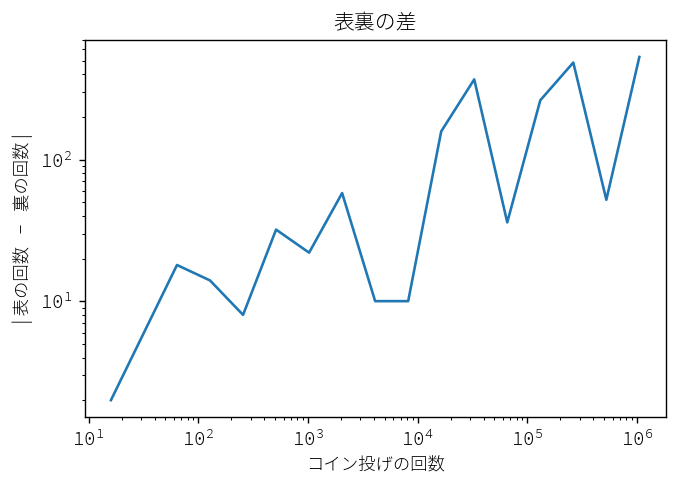

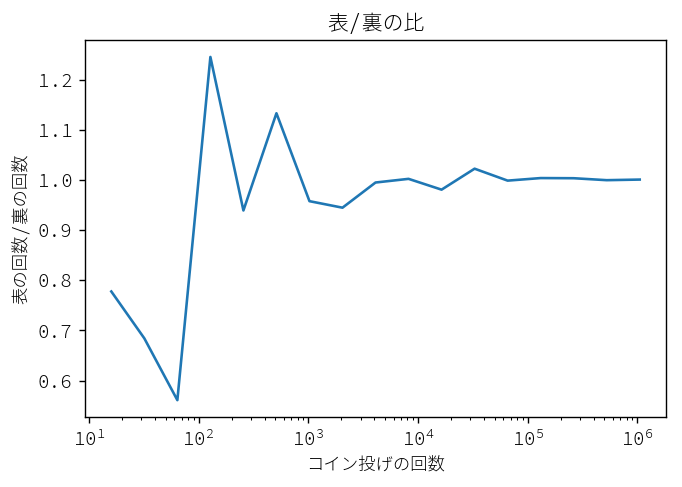

In [17]:
random.seed(0)
flipPlot(4, 20)

In [18]:
def flipPlot(minExp, maxExp):
    """minExp と maxExp を minExp < maxExp を満たす正の整数とする
       2**minExp から 2**maxExp 回のコイン投げの結果をプロットする"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))
    pylab.figure(dpi=125)
    pylab.title(u'表裏の差')
    pylab.xlabel(u'コイン投げの回数')
    pylab.ylabel(u'|表の回数 - 裏の回数|')
    pylab.loglog(xAxis, diffs, 'bo')
    pylab.figure(dpi=125)
    pylab.title(u'表/裏の比')
    pylab.xlabel(u'コイン投げの回数')
    pylab.ylabel(u'表の回数/裏の回数')
    pylab.semilogx
    pylab.semilogx(xAxis, ratios, 'bo')

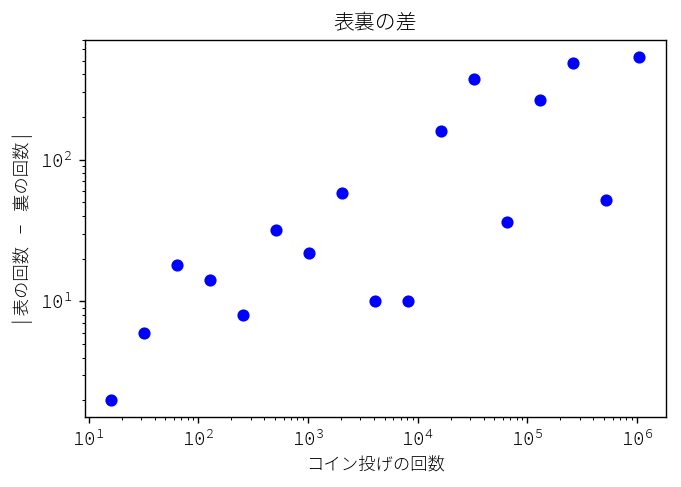

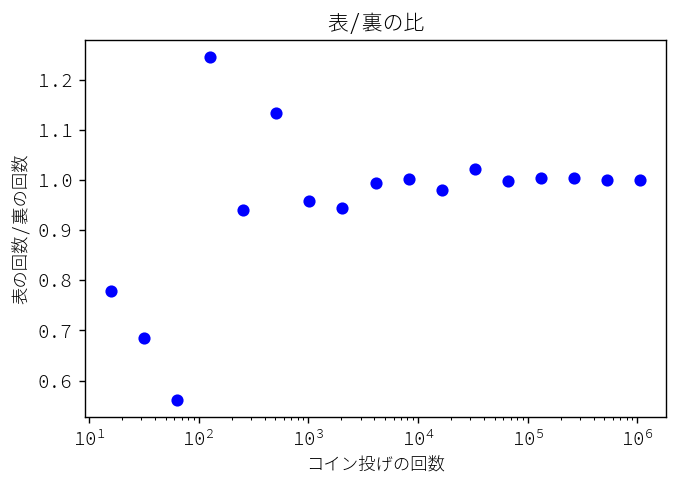

In [19]:
random.seed(0)
flipPlot(4, 20)

In [20]:
def variance(X):
    """Xを数のリストとする
       Xの分散を返す"""
    mean = sum(X) / len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean) ** 2
    return tot / len(X)

In [21]:
def stdDev(X):
    """Xを数のリストとする
       Xの標準偏差を返す"""
    return variance(X) ** 0.5

In [22]:
def makePlot(xVals, yVals, title, xLabel, yLabel, style,
             logX = False, logY = False):
    """xVal に対する yVal の値を，題名と軸名入りでプロットする"""
    pylab.figure(dpi=125)
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals, yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()

In [23]:
def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.random() < 0.5:
            numHeads += 1
    numTails = numFlips - numHeads
    return (numHeads, numTails)

In [24]:
def flipPlot(minExp, maxExp, numTrials):
    """minExp と maxExp は minExp < maxExp を満たす正の整数，
       numTrials は正の整数とする
       2**minExp から 2**maxExp 回のコイン投げを numTrials 回
       行った結果の要約をプロットする"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/float(numTrials))
        diffsMeans.append(sum(diffs)/float(numTrials))
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    numTrialsString = ' (' + str(numTrials) + u'回試行)'
    title = u'表/裏の比の平均値' + numTrialsString
    makePlot(xAxis, ratiosMeans, title,
             u'コイン投げの回数', u'表/裏の平均', 'bo', logX = True)
    title = u'表/裏の比の標準偏差' + numTrialsString
    makePlot(xAxis, ratiosSDs, title,
             u'コイン投げの回数', u'表/裏の標準偏差', 'bo',
             logX = True, logY = True)

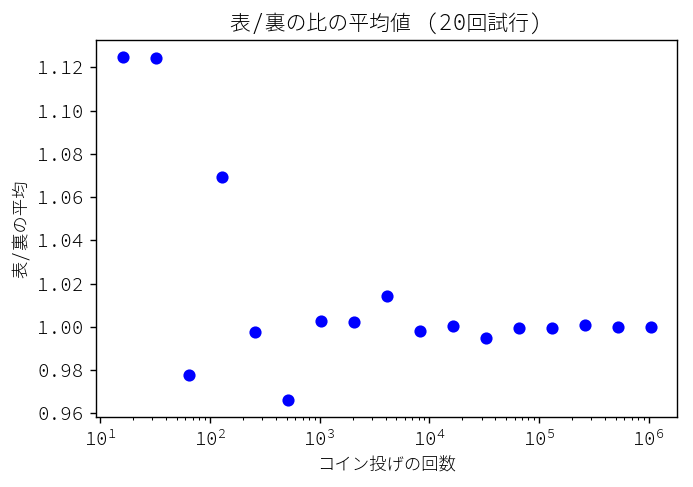

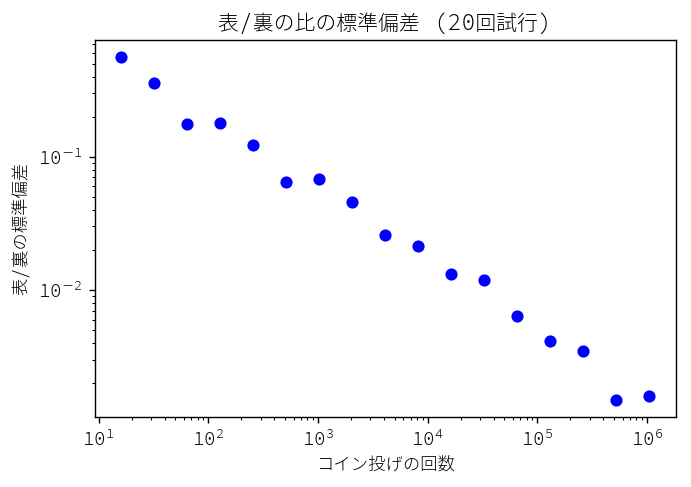

In [25]:
flipPlot(4, 20, 20)

In [26]:
def flipPlot(minExp, maxExp, numTrials):
    """minExp と maxExp は minExp < maxExp を満たす正の整数，
       numTrials は正の整数とする
       2**minExp から 2**maxExp 回のコイン投げを numTrials 回
       行った結果の要約をプロットする"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/float(numTrials))
        diffsMeans.append(sum(diffs)/float(numTrials))
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    numTrialsString = ' (' + str(numTrials) + u'回試行)'
    title = u'表/裏の比の平均値' + numTrialsString
    makePlot(xAxis, ratiosMeans, title,
             u'コイン投げの回数', u'表/裏の平均', 'bo', logX = True)
    title = u'表/裏の比の標準偏差' + numTrialsString
    makePlot(xAxis, ratiosSDs, title,
             u'コイン投げの回数', u'表/裏の標準偏差', 'bo',
             logX = True, logY = True)
    title = u'|表-裏|の平均' + numTrialsString
    makePlot(xAxis, diffsMeans, title,
             u'コイン投げの回数', u'|表-裏|の平均', 'bo', logX = True, logY = True)
    title = u'|表-裏|の標準偏差' + numTrialsString
    makePlot(xAxis, diffsSDs, title,
             u'コイン投げの回数', u'|表-裏|の標準偏差', 'bo', logX = True, logY = True)

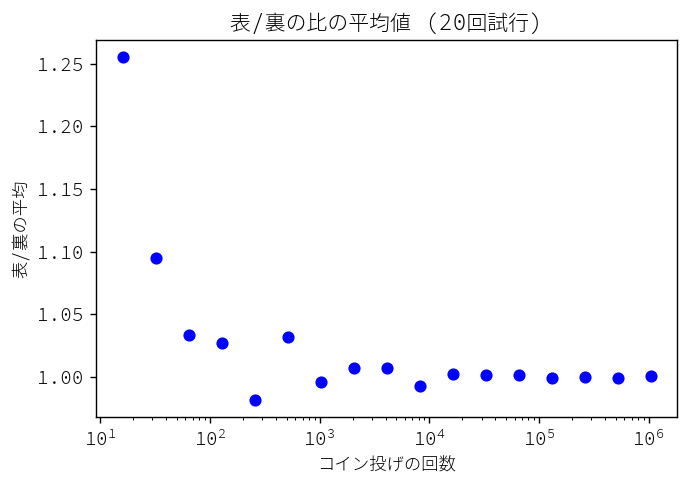

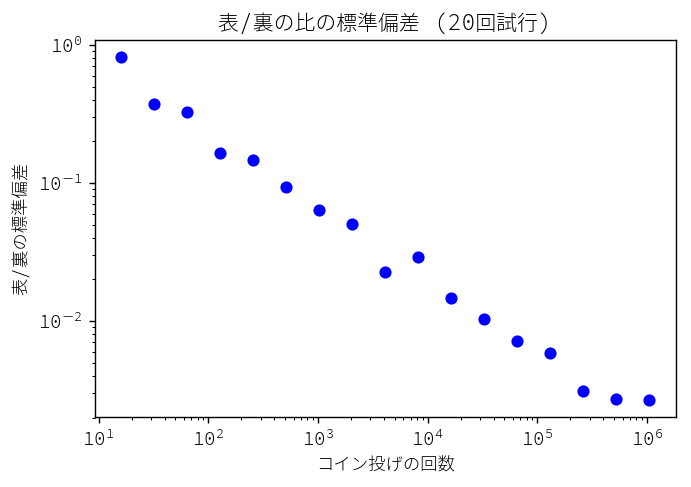

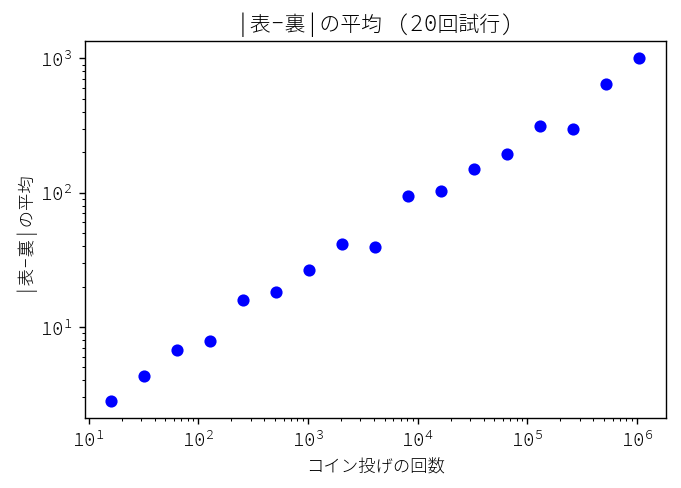

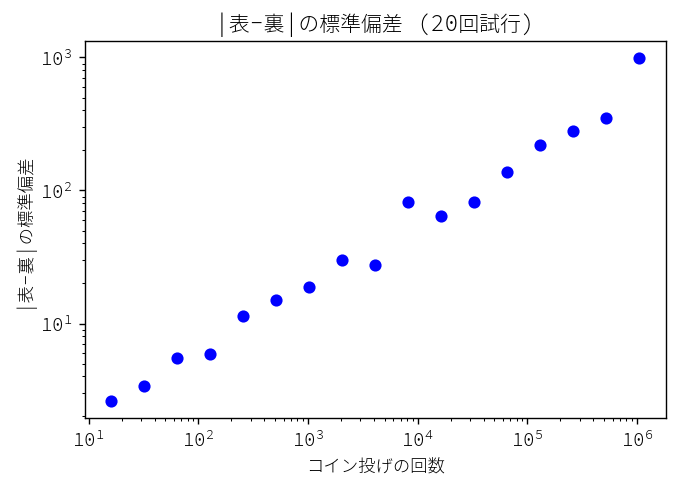

In [27]:
flipPlot(4, 20, 20)

In [28]:
def CV(X):
    mean = sum(X) / float(len(X))
    try:
        return stdDev(X) / mean
    except ZeroDivisionError:
        return float('nan')

In [29]:
def flipPlot1(minExp, maxExp, numTrials):
    """minExp と maxExp は minExp < maxExp を満たす正の整数，
       numTrials は正の整数とする
       2**minExp から 2**maxExp 回のコイン投げを numTrials 回
       行った結果の要約をプロットする"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    ratiosCVs, diffsCVs = [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/float(numTrials))
        diffsMeans.append(sum(diffs)/float(numTrials))
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
    numTrialsString = ' (' + str(numTrials) + u'回試行)'
    title = u'表/裏の比の平均' + numTrialsString
    makePlot(xAxis, ratiosMeans, title,
             u'コイン投げの回数', u'表/裏の平均', 'bo', logX = True)
    title = u'表/裏の比の標準偏差' + numTrialsString
    makePlot(xAxis, ratiosSDs, title,
             u'コイン投げの回数', u'標準偏差', 'bo',
             logX = True, logY = True)
    title = u'|表の回数 - 裏の回数|の平均' + numTrialsString
    makePlot(xAxis, diffsMeans, title,
             u'コイン投げの回数', u'|表の回数 - 裏の回数|の平均', 'bo',
             logX = True, logY = True)
    title = u'|表の回数 - 裏の回数|の標準偏差' + numTrialsString
    makePlot(xAxis, diffsSDs, title,
             u'コイン投げの回数', u'標準偏差', 'bo',
             logX = True, logY = True)
    title = u'|表の回数 - 裏の回数|の変動係数' + numTrialsString
    makePlot(xAxis, diffsCVs, title, u'コイン投げの回数',
             u'変動係数', 'bo', logX = True)
    title = u'表/裏の比の変動係数' + numTrialsString
    makePlot(xAxis, ratiosCVs, title, u'コイン投げの回数',
             u'変動係数', 'bo', logX = True, logY = True)

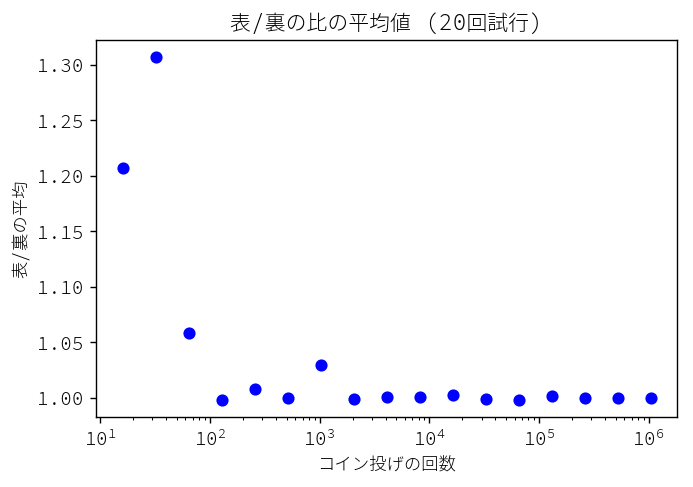

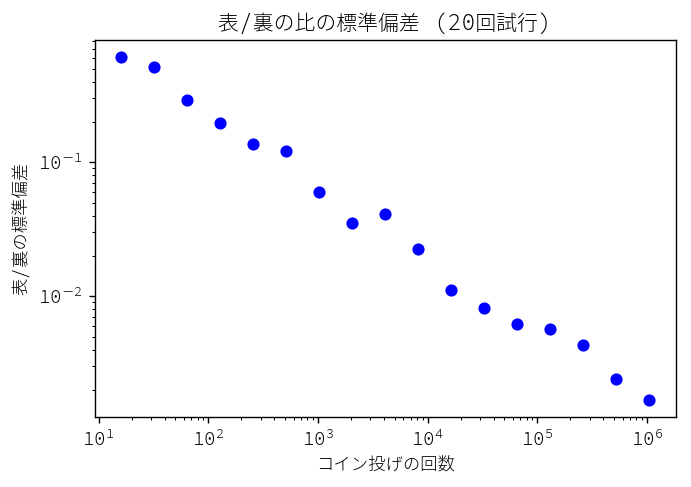

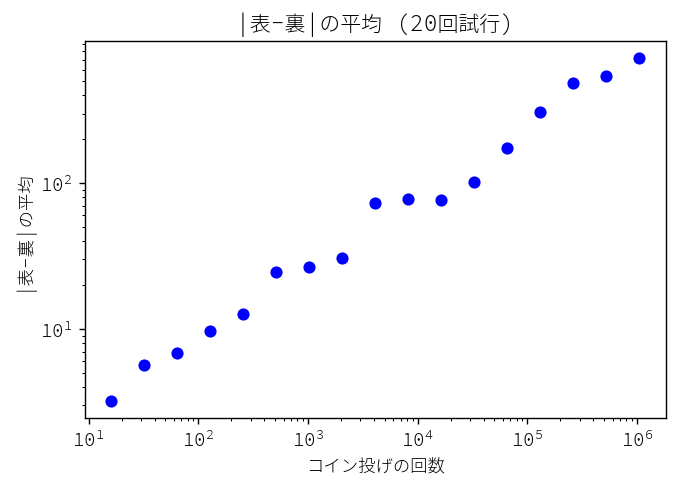

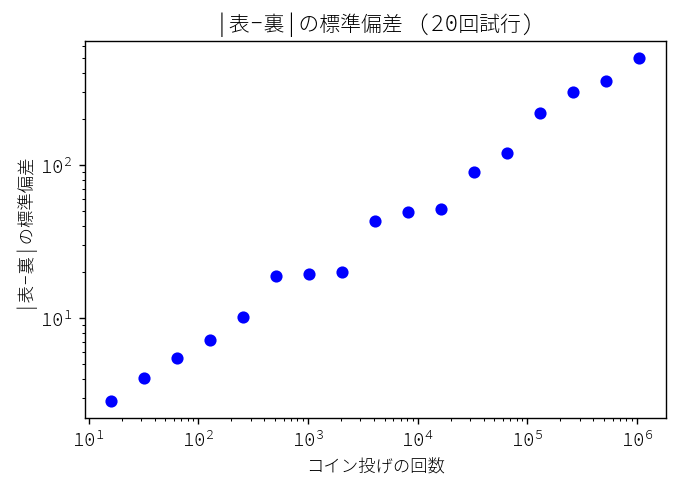

In [30]:
flipPlot(4, 20, 20)

(array([ 15.,  58.,  98., 152., 168., 171., 155., 112.,  54.,  19.]),
 array([  1. ,  20.9,  40.8,  60.7,  80.6, 100.5, 120.4, 140.3, 160.2,
        180.1, 200. ]),
 <a list of 10 Patch objects>)

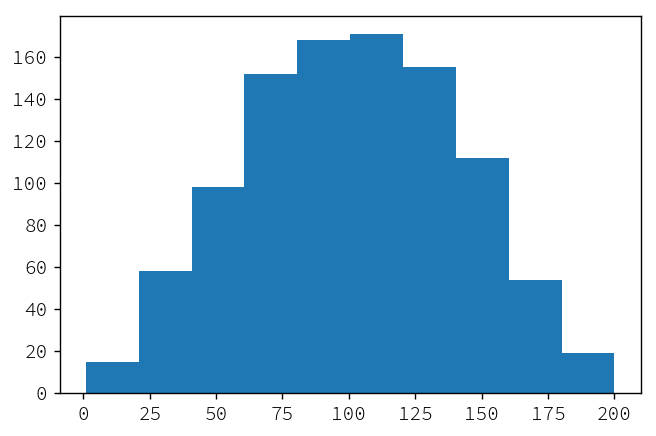

In [31]:
pylab.figure(dpi=125)
vals = [1, 200] # 値が 1 から 200 の範囲にあること仮定
for i in range(1000):
    num1 = random.choice(range(1, 100))
    num2 = random.choice(range(1, 100))
    vals.append(num1+num2)
pylab.hist(vals, bins = 10)

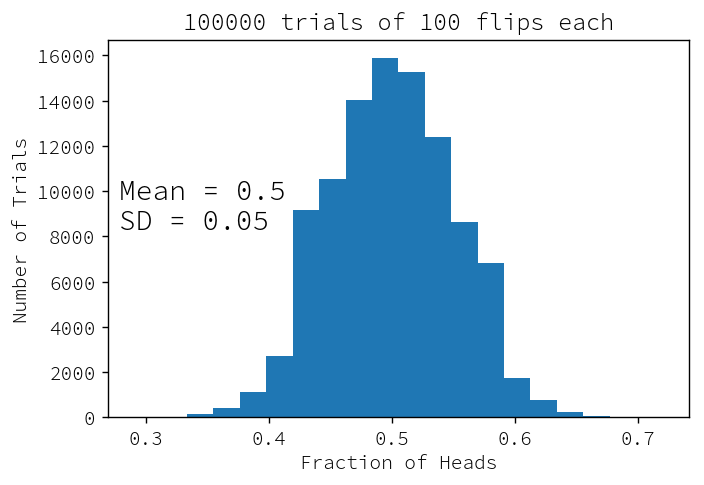

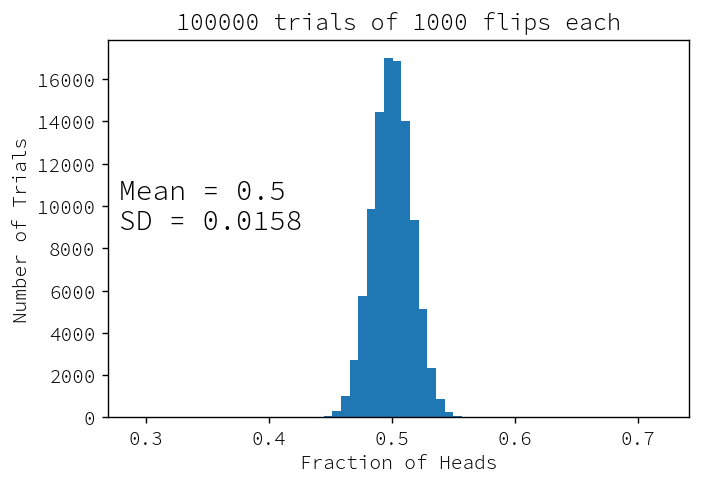

In [32]:
def flip(numFlips):
    heads = 0.0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + ' trials of '
                + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    pylab.text(xmin + (xmax-xmin)*0.02, (ymax-ymin)/2,
               'Mean = ' + str(round(mean, 4))
               + '\nSD = ' + str(round(sd, 4)), size='x-large')

def makePlots(numFlips1, numFlips2, numTrials):
    pylab.figure(dpi=125)
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins = 20)
    xmin,xmax = pylab.xlim()
    ymin,ymax = pylab.ylim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure(dpi=125)
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 20)
    pylab.xlim(xmin, xmax)
    labelPlot(numFlips2, numTrials, mean2, sd2)

random.seed(0)
makePlots(100,1000,100000)

In [33]:
def showErrorBars(minExp, maxExp, numTrials):
    """minExp と maxExp は minExp < maxExp を満たす正の整数，
       numTrials は正の整数とする．
       表の割合の平均を誤差棒付きでプロットする"""
    pylab.figure(dpi=125)
    means, sds = [], []
    xVals = []
    for exp in range(minExp, maxExp + 1):
        xVals.append(2**exp)
        fracHeads, mean, sd = flipSim(2**exp, numTrials)
        means.append(mean)
        sds.append(sd)
    pylab.errorbar(xVals, means,
                   yerr=2*pylab.array(sds))
    pylab.semilogx()
    pylab.title('Mean Fraction of Heads (' + str(numTrials) + ' trials)')
    pylab.xlabel('Number of flips per trial')
    pylab.ylabel('Fraction of heads & 95% confidence')

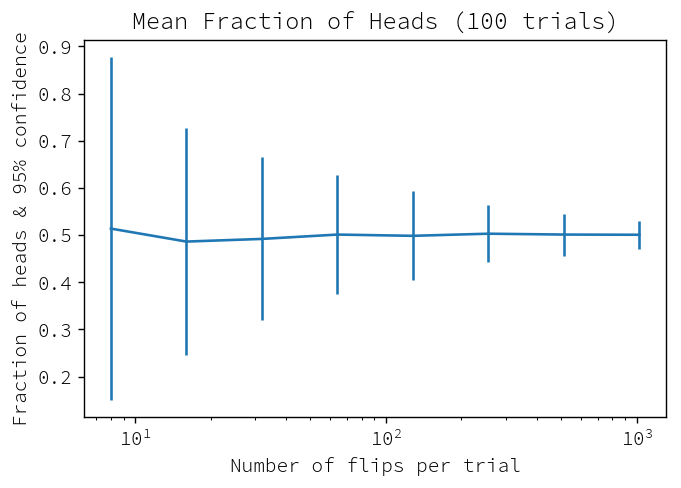

In [34]:
random.seed(0)
showErrorBars(3,10,100)